In [1]:
import os

path = 'data/MnM-2/'
os.listdir(path)

['training', 'validation']

In [2]:
train_path = path + 'training/'
train_data = os.listdir(train_path)
len(train_data)

160

In [3]:
val_path = path + 'validation/'
val_data = os.listdir(val_path)
len(val_data)

40

In [7]:
for patient in train_data:
    assert patient not in val_data 

In [8]:
sample = train_data[0]
os.listdir(train_path + sample)

['140_SA_ES_gt.nii.gz',
 '140_LA_CINE.nii.gz',
 '140_LA_ES.nii.gz',
 '140_LA_ES_gt.nii.gz',
 '140_SA_CINE.nii.gz',
 '140_LA_ED.nii.gz',
 '140_SA_ED.nii.gz',
 '140_SA_ES.nii.gz',
 '140_LA_ED_gt.nii.gz',
 '140_SA_ED_gt.nii.gz']

In [15]:
import nibabel as nib
import random

ix = random.randint(0, len(train_data))
sample = train_data[ix]
image_path = f'{train_path}/{sample}/{sample}_LA_ED.nii.gz'
img = nib.load(image_path).get_fdata()
img.shape, img.dtype, img.max(), img.min(), nib.load(image_path).affine

((210, 256, 1),
 dtype('<f8'),
 992.0,
 0.0,
 array([[-2.18007881e-02,  1.24844790e+00,  4.66648489e-02,
         -1.34246017e+02],
        [ 1.17089510e+00,  3.78689187e-08,  3.50089848e-01,
         -1.72275314e+02],
        [ 4.37068939e-01,  6.22718818e-02, -9.35553014e-01,
         -1.10785172e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]))

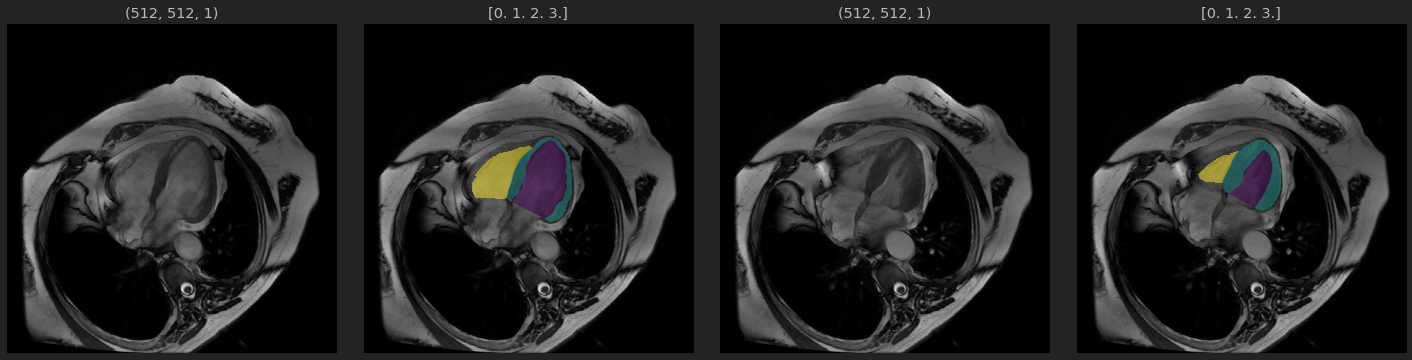

In [20]:
import matplotlib.pyplot as plt

ix = random.randint(0, len(train_data))
sample = train_data[ix]
fig = plt.figure(figsize=(20,5))
ax = plt.subplot(1, 4, 1)
image_path = f'{train_path}/{sample}/{sample}_LA_ED.nii.gz'
img = nib.load(image_path).get_fdata()
ax.imshow(img,cmap='gray')
ax.axis('off')
ax.set_title(img.shape)
ax = plt.subplot(1, 4, 2)
image_path = f'{train_path}/{sample}/{sample}_LA_ED_gt.nii.gz'
mask = nib.load(image_path).get_fdata()
ax.imshow(img, cmap='gray')
ax.set_title(np.unique(mask))
mask[mask == 0] = np.nan
ax.imshow(mask, alpha=0.5)
ax.axis('off')
ax = plt.subplot(1, 4, 3)
image_path = f'{train_path}/{sample}/{sample}_LA_ES.nii.gz'
img = nib.load(image_path).get_fdata()
ax.imshow(img,cmap='gray')
ax.axis('off')
ax.set_title(img.shape)
ax = plt.subplot(1, 4, 4)
image_path = f'{train_path}/{sample}/{sample}_LA_ES_gt.nii.gz'
mask = nib.load(image_path).get_fdata()
ax.imshow(img, cmap='gray')
ax.set_title(np.unique(mask))
mask[mask == 0] = np.nan
ax.imshow(mask, alpha=0.5)
ax.axis('off')
plt.tight_layout()
plt.show()

LA puede tener diferentes tamaños, siempre 1 solo canal con labels 0,1,2,3

In [21]:
ix = random.randint(0, len(train_data))
sample = train_data[ix]
image_path = f'{train_path}/{sample}/{sample}_SA_ED.nii.gz'
img = nib.load(image_path).get_fdata()
img.shape, img.dtype, img.max(), img.min()

((320, 320, 10), dtype('<f8'), 255.0, 0.0)

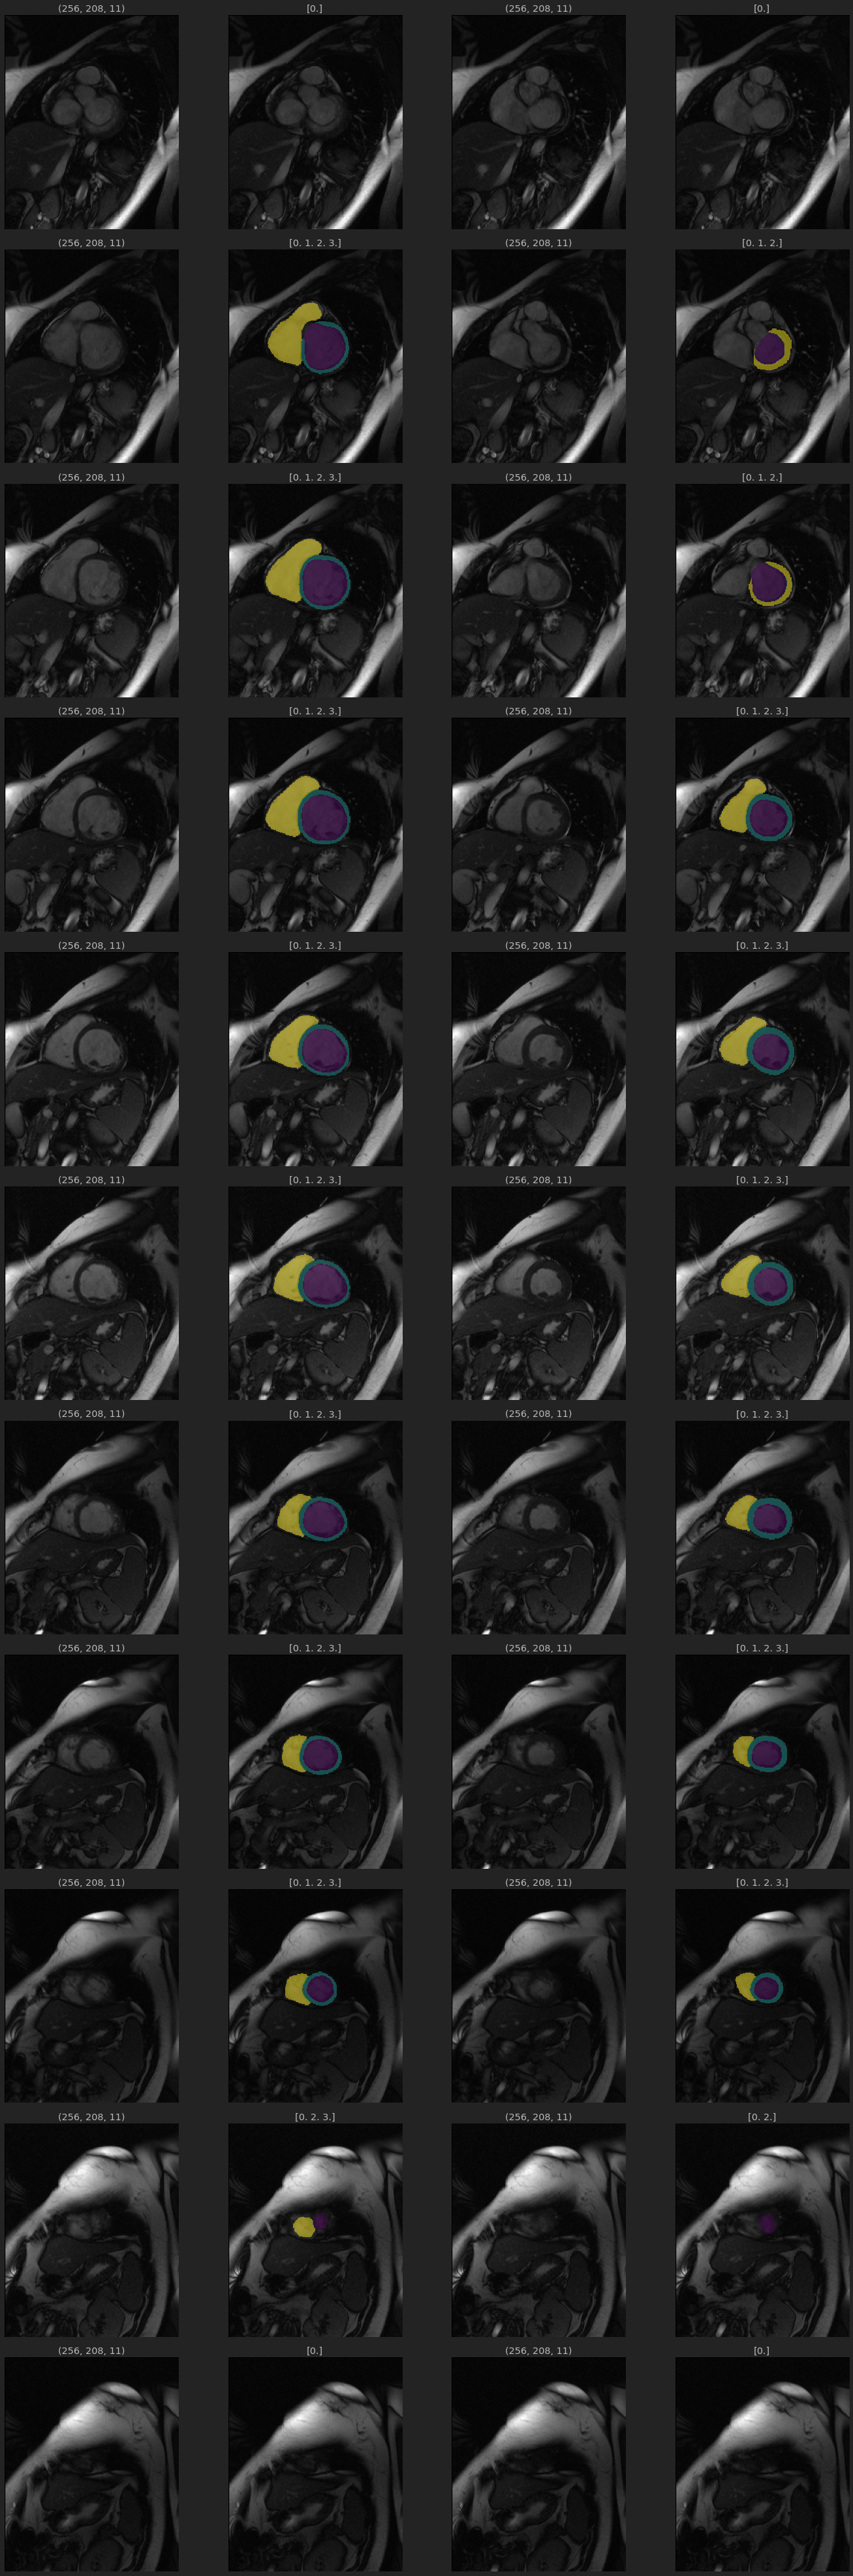

In [24]:
files = ['SA_ED', 'SA_ES']
ix = random.randint(0, len(train_data))
sample = train_data[ix]
    
image_path = f'{train_path}/{sample}/{sample}_SA_ED.nii.gz'
ed_img = nib.load(image_path).get_fdata()
channels = ed_img.shape[-1]

image_path = f'{train_path}/{sample}/{sample}_SA_ED_gt.nii.gz'
ed_mask = nib.load(image_path).get_fdata()
assert channels == ed_mask.shape[-1]

image_path = f'{train_path}/{sample}/{sample}_SA_ES.nii.gz'
es_img = nib.load(image_path).get_fdata()
assert channels == es_img.shape[-1]

image_path = f'{train_path}/{sample}/{sample}_SA_ES_gt.nii.gz'
es_mask = nib.load(image_path).get_fdata()
assert channels == es_mask.shape[-1]

fig = plt.figure(figsize=(20, channels*5))
for c in range(channels):
    ax = plt.subplot(channels, 4, 4*c + 1)
    ax.imshow(ed_img[...,c],cmap='gray')
    ax.axis('off')
    ax.set_title(ed_img.shape)
    ax = plt.subplot(channels, 4, 4*c + 2)
    ax.imshow(ed_img[...,c], cmap='gray')
    mask = ed_mask[...,c]
    ax.set_title(np.unique(mask))
    mask[mask == 0] = np.nan
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
    ax = plt.subplot(channels, 4, 4*c + 3)
    ax.imshow(es_img[...,c],cmap='gray')
    ax.axis('off')
    ax.set_title(es_img.shape)
    ax = plt.subplot(channels, 4, 4*c + 4)
    ax.imshow(es_img[...,c], cmap='gray')
    mask = es_mask[...,c]
    ax.set_title(np.unique(mask))
    mask[mask == 0] = np.nan
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')

plt.tight_layout()
plt.show()

SA puede tener diferentes tamaños, con número variable de canales y labels 0,1,2,3

In [26]:
sample = val_data[0]
os.listdir(val_path + sample)

['194_LA_ES.nii.gz',
 '194_SA_CINE.nii.gz',
 '194_LA_CINE.nii.gz',
 '194_SA_ED.nii.gz',
 '194_SA_ES.nii.gz',
 '194_LA_ED.nii.gz']

In [59]:
from tqdm import tqdm 

files = ['LA_ED', 'LA_ES', 'SA_ED', 'SA_ES']
stats = {k: [] for k in files}
for patient in tqdm(train_data):
    for f in files:
        image_path = f'{train_path}/{patient}/{patient}_{f}.nii.gz'
        img = nib.load(image_path).get_fdata()
        stats[f].append(np.array([img.max(), img.min(), img.shape]))
        
stats = {k: np.array(v) for k, v in stats.items()}

  0%|          | 0/160 [00:00<?, ?it/s]<ipython-input-59-6356581b8ec5>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  stats[f].append(np.array([img.max(), img.min(), img.shape]))
100%|██████████| 160/160 [00:07<00:00, 20.94it/s]


In [60]:
for k, v in stats.items():
    print(k)
    print('    max', v[:,0].min(), v[:,0].max())    
    print('    min', v[:,1].min(), v[:,1].max())
    print('    shape', v[:,2].min(), v[:,2].max())    

LA_ED
    max 125.0 4104.0
    min 0.0 0.0
    shape (208, 256, 1) (512, 512, 1)
LA_ES
    max 133.0 7875.0
    min 0.0 0.0
    shape (208, 256, 1) (512, 512, 1)
SA_ED
    max 168.0 11510.0
    min 0.0 0.0
    shape (192, 240, 12) (512, 512, 17)
SA_ES
    max 191.0 9182.0
    min 0.0 0.0
    shape (192, 240, 12) (512, 512, 17)


In [34]:
data = {
    'patient': [],
    'image': [],
    'channel': []
}

for patient in tqdm(sorted(train_data)):
    for f in files:
        image_path = f'{train_path}/{patient}/{patient}_{f}.nii.gz'
        img = nib.load(image_path)
        channels = img.shape[-1]
        for channel in range(channels):
            data['patient'] += [patient]
            data['image'] += [f]
            data['channel'] += [channel]

100%|██████████| 160/160 [00:00<00:00, 601.15it/s]


In [36]:
import pandas as pd 

df = pd.DataFrame(data)
df

,patient,image,channel
0,001,LA_ED,0
1,001,LA_ES,0
2,001,SA_ED,0
3,001,SA_ED,1
4,001,SA_ED,2
...,...,...,...
3869,160,SA_ES,2
3870,160,SA_ES,3
3871,160,SA_ES,4
3872,160,SA_ES,5


In [37]:
df.to_csv('training_data.csv', index=False)